## Bank marketing data project
                                                                                                ##created by Christian Coffrant

In this project we will explore the a data set which was created from the results of a telemarketing campaign conducted in 2011. The campaign comprised of telemarketers from the bank contacting 45210 customers and offering them a term deposit account. The data which was collected relates to the frequency and method in which the customer was contacted, some of the data also relates to the details of the customer, and finally whether or not the customer has the client subscribed for a term deposit?

We will start off by importing the required libaries

In [117]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

We then import the banking data as a dataframe using pandas

In [2]:
bank = pd.read_csv('bank-full.csv', delimiter=';')

We will look at the head, shape, description, and data types of the data

In [3]:
print(bank.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [5]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Exploratory data analysis

Now that we have an idea of the shape and structure of our data we will look into the individual features

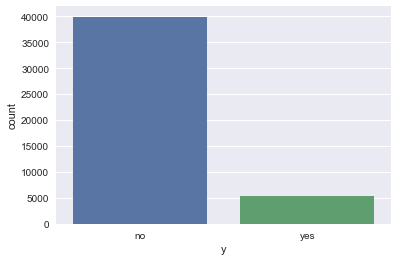

In [108]:
# Y - This is our binary output variable, it tells us has the client subscribed a term deposit?
sns.countplot(x="y", data=bank)


In [98]:
# Proportion of yes/no

# we'll start off by counting the total number of people who did and didn't subscribe
ycount = bank['y'].value_counts()
# we need to count the number of total observations
rowcount = bank.shape[0]-1

print('Proportion yes: ' + '{0:2.3f}'.format((ycount[1]/rowcount)))
print('Proportion no: ' + '{0:2.3f}'.format((ycount[0]/rowcount)))

# We'll save the overall proportion of successes as the variable expected, this will help us with our chi squared tests
expected = ycount[1]/rowcount

Proportion yes: 0.117
Proportion no: 0.883


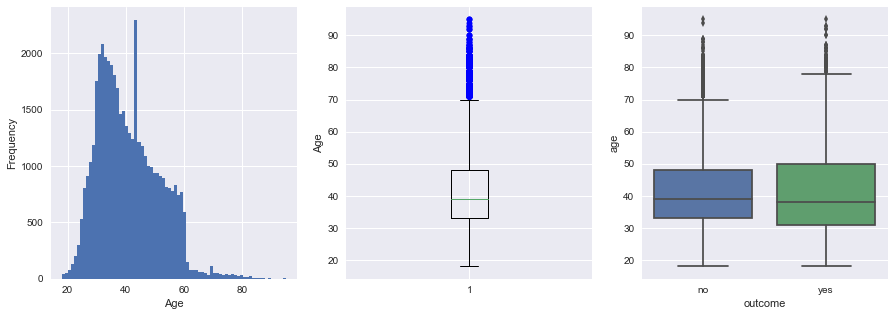

In [303]:
# AGE - This is the age of the customers contacted

plt.subplot(1, 3, 1)
ageplt = bank.age.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Age')

plt.subplot(1, 3, 2)
agebox = plt.boxplot(bank.age, 0, 'b')
plt.ylabel('Age')

plt.subplot(1, 3, 3)
agebox2 = sns.boxplot(x="y", y="age", data=bank)
agebox2.set(xlabel='outcome')

In [316]:
#Logistic regression

# We start by creating training data frame, it consists of dummy variables for the ages and the outcome, notice that since we
# a binary outcome we drop the 'no' variable, since we know that not yes means no

agedf = bank.loc[:,'age']
ydf = bank.loc[:,'y']
y = pd.get_dummies(ydf)
age = pd.get_dummies(agedf)
train = pd.concat([age,y],axis=1)
train.drop(['no'],axis=1,inplace=True)

# We split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(train.drop('yes', axis=1), train['yes'], test_size=0.30)

# We run the logistic regression and check the accuracy of our model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94     12005
          1       0.46      0.01      0.01      1559

avg / total       0.84      0.88      0.83     13564



In [125]:
# T test, we'll also conduct a t-test to see the statistical significance between the age of the customers who subscribed vs
# those who didn't

ageyes = bank['age'].loc[bank['y'] == 'yes']
ageno = bank['age'].loc[bank['y'] == 'no']

t = abs(np.mean(ageyes)-np.mean(ageno))/(math.sqrt(((np.std(ageyes)**2)/len(ageyes))+((np.std(ageno)**2)/len(ageno))))
print('t-value: ' +str(t))

t-value: 4.318701093196275


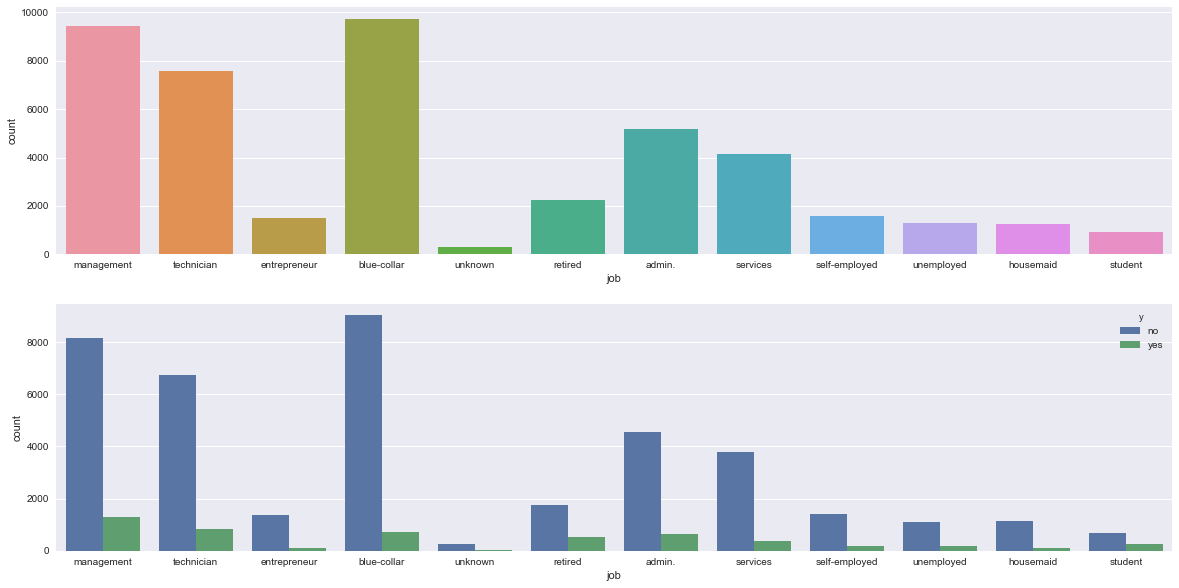

In [140]:
# Job - is the type of job of each of the customers
fig, axes = plt.subplots(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.countplot(x="job", data=bank)
plt.subplot(2, 1, 2)
sns.countplot(x="job", hue='y', data=bank)

In [138]:
# Calculate the proportion of those who subscribed vs those who didn't, grouped by job

jobsuccess = bank['job'].loc[bank['y']== 'yes'].value_counts()
jobcount = bank['job'].value_counts()

for item in range(len(jobcount)):
    print("The proportion of success for the employment category: "+ str(jobcount.keys()[item])+" is "+'{0:2.3f}'.format(jobsuccess[item]/jobcount[item]))

The proportion of success for the employment category: blue-collar is 0.134
The proportion of success for the employment category: management is 0.089
The proportion of success for the employment category: technician is 0.093
The proportion of success for the employment category: admin. is 0.122
The proportion of success for the employment category: services is 0.124
The proportion of success for the employment category: retired is 0.163
The proportion of success for the employment category: self-employed is 0.170
The proportion of success for the employment category: entrepreneur is 0.136
The proportion of success for the employment category: unemployed is 0.144
The proportion of success for the employment category: housemaid is 0.099
The proportion of success for the employment category: student is 0.116
The proportion of success for the employment category: unknown is 0.118


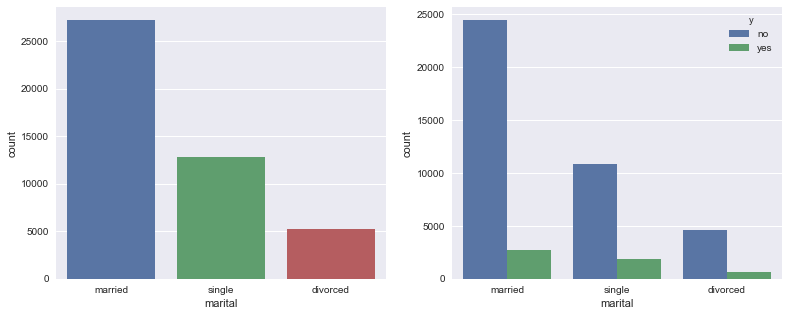

In [164]:
# Marital - Is the marital status of the customers

fig, axes = plt.subplots(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="marital", data=bank)

plt.subplot(1, 2, 2)
sns.countplot(x="marital", hue='y', data=bank)

In [151]:
# Calculate the proportion of those who subscribed vs those who didn't, grouped by marital status

maritalsuccess = bank['marital'].loc[bank['y']== 'yes'].value_counts()
maritalcount = bank['marital'].value_counts()

for item in range(len(maritalcount)):
    print("The proportion of success for marital status: "+ str(maritalcount.keys()[item])+" is "+'{0:2.3f}'.format(maritalsuccess[item]/maritalcount[item]))

#Chi squared test

sum = 0

for item in range(len(maritalcount)):
    sum += (((maritalsuccess[item]/maritalcount[item])-expected)**2)/expected

print('Test statistic: ' + str(sum))

The proportion of success for marital status: married is 0.101
The proportion of success for marital status: single is 0.149
The proportion of success for marital status: divorced is 0.119
Test statistic: 0.011205481135


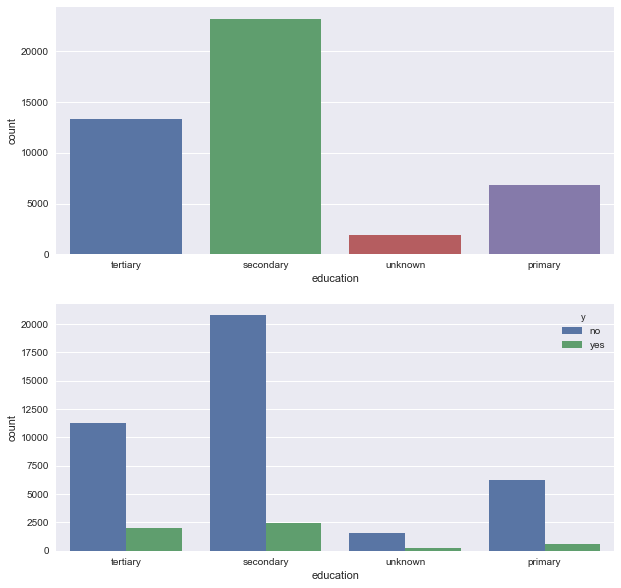

In [161]:
# Education - Is the level of education of the customer

fig, axes = plt.subplots(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.countplot(x="education", data=bank)

plt.subplot(2, 1, 2)
sns.countplot(x="education", hue='y', data=bank)

In [102]:
# Calculate the proportion of those who subscribed vs those who didn't, grouped by level of education

educationsuccess = bank['education'].loc[bank['y']== 'yes'].value_counts()
educationcount = bank['education'].value_counts()

for item in range(len(educationcount)):
    print("The proportion of success for the education level: "+ str(educationcount.keys()[item])+" is "+'{0:2.3f}'.format(educationsuccess[item]/educationcount[item]))

#Chi squared test

sum = 0

for item in range(len(educationcount)):
    sum += (((educationsuccess[item]/educationcount[item])-expected)**2)/expected

print(sum)

The proportion of success for the education level: secondary is 0.106
The proportion of success for the education level: tertiary is 0.150
The proportion of success for the education level: primary is 0.086
The proportion of success for the education level: unknown is 0.136
0.0215245969629


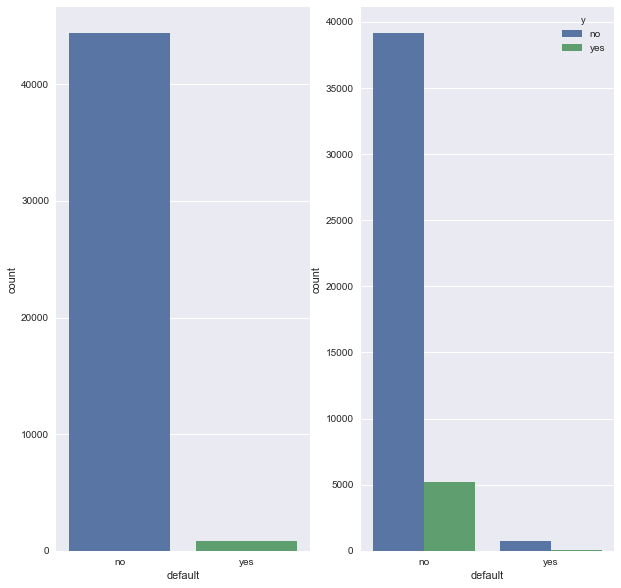

In [166]:
# Default - has credit in default?
fig, axes = plt.subplots(figsize=(10, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="default", data=bank)

plt.subplot(1, 2, 2)
sns.countplot(x="default", hue='y', data=bank)

In [93]:
# Calculate the proportion of those who subscribed vs those who didn't, grouped by whether or not the customer has credit in default

defaultsuccess = bank['default'].loc[bank['y']== 'yes'].value_counts()
defaultcount = bank['default'].value_counts()

for item in range(len(defaultcount)):
    print("The proportion of success for default: "+ str(defaultcount.keys()[item])+" is "+'{0:2.3f}'.format(defaultsuccess[item]/defaultcount[item]))

The proportion of success for default: no is 0.118
The proportion of success for default: yes is 0.064


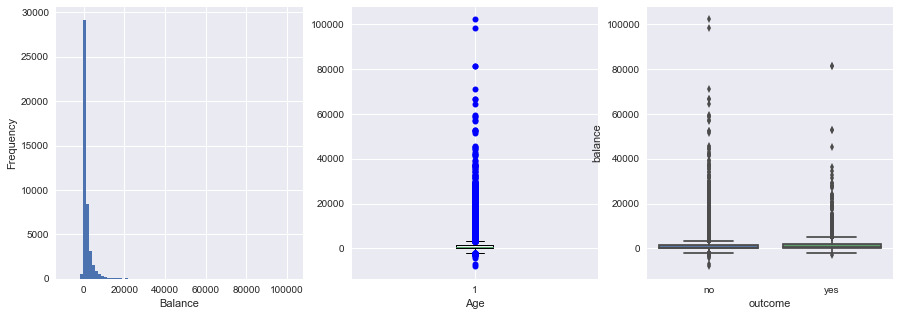

In [118]:
# Balance - average yearly balance, in euros

plt.subplot(1, 3, 1)
balanceplt = bank.balance.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Balance')

plt.subplot(1, 3, 2)
balancebox = plt.boxplot(bank.balance, 0, 'b')
plt.xlabel('Age')

plt.subplot(1, 3, 3)
balancebox2 = sns.boxplot(x="y", y="balance", data=bank)
balancebox2.set(xlabel='outcome')

In [317]:
#Logistic regression

# We start by creating training data frame, it consists of dummy variables for the ages and the outcome, notice that since we
# a binary outcome we drop the 'no' variable, since we know that not yes means no
balancedf = bank.loc[:,'balance']
ydf = bank.loc[:,'y']
y = pd.get_dummies(ydf)
balance = pd.get_dummies(balancedf)
train = pd.concat([balance,y],axis=1)
train.drop(['no'],axis=1,inplace=True)

# We split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(train.drop('yes', axis=1), train['yes'], test_size=0.30)

# We run the logistic regression and check the accuracy of our model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94     11950
          1       0.80      0.00      0.00      1614

avg / total       0.87      0.88      0.83     13564



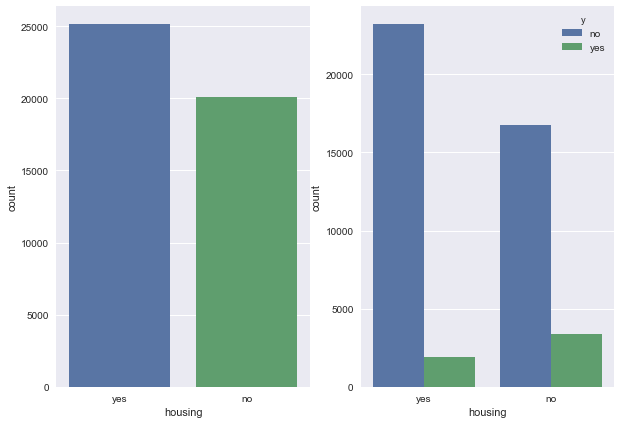

In [168]:
# Housing - has housing loan?
fig, axes = plt.subplots(figsize=(10, 7))
plt.subplot(1, 2, 1)
sns.countplot(x="housing", data=bank)

plt.subplot(1, 2, 2)
sns.countplot(x="housing", hue='y', data=bank)

In [133]:
# Calculate the proportion of those who subscribed vs those who didn't, grouped by housing

housingsuccess = bank['housing'].loc[bank['y']== 'yes'].value_counts()
housingcount = bank['housing'].value_counts()

for item in range(len(housingcount)):
    print("The proportion of success for housing: "+ str(housingcount.keys()[item])+" is "+'{0:2.3f}'.format(housingsuccess[item]/housingcount[item]))


#Chi squared test

sum = 0

for item in range(len(housingcount)):
    sum += (((housingsuccess[item]/housingcount[item])-expected)**2)/expected

print('Summary statistic: ' + str(sum))

The proportion of success for housing: yes is 0.133
The proportion of success for housing: no is 0.096
Summary statistic: 0.0059582285726


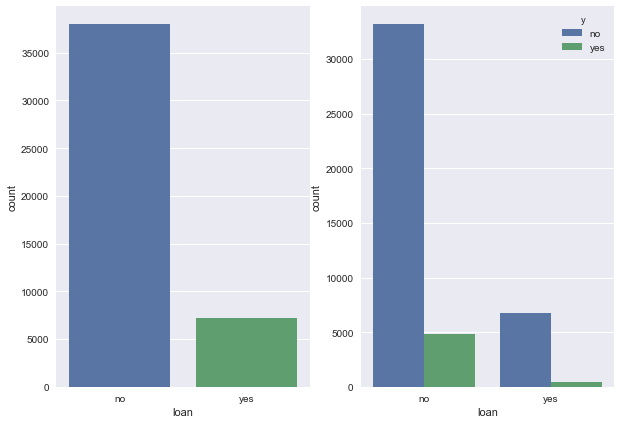

In [170]:
# Loan - has personal loan?
fig, axes = plt.subplots(figsize=(10, 7))
plt.subplot(1, 2, 1)
sns.countplot(x="loan", data=bank)

plt.subplot(1, 2, 2)
sns.countplot(x="loan", hue='y', data=bank)

In [137]:
# Calculate the proportion of those who subscribed vs those who didn't, grouped by loan

loansuccess = bank['loan'].loc[bank['y']== 'yes'].value_counts()
loancount = bank['loan'].value_counts()

for item in range(len(loancount)):
    print("The proportion of success for the loan: "+ str(loancount.keys()[item])+" is "+'{0:2.3f}'.format(loansuccess[item]/loancount[item]))


#Chi squared test

sum = 0

for item in range(len(loancount)):
    sum += (((loansuccess[item]/loancount[item])-expected)**2)/expected

print('Summary statistic: '+ str(sum))

The proportion of success for the loan: no is 0.127
The proportion of success for the loan: yes is 0.067
Summary statistic: 0.0222999075317


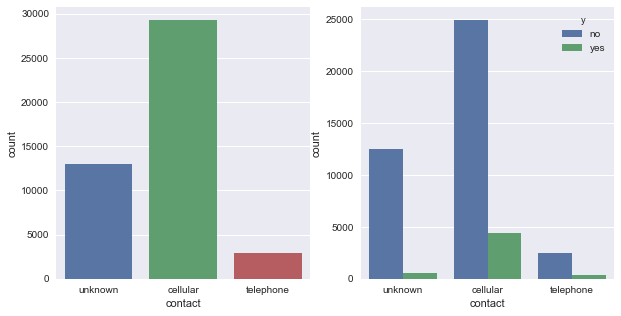

In [171]:
# Contact
fig, axes = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="contact", data=bank)

plt.subplot(1, 2, 2)
sns.countplot(x="contact", hue='y', data=bank)

In [142]:
# Calculate the proportion of those who subscribed vs those who didn't, grouped by contact method

contactsuccess = bank['contact'].loc[bank['y']== 'yes'].value_counts()
contactcount = bank['contact'].value_counts()

for item in range(len(contactcount)):
    print("The proportion of success for the contact method: "+ str(contactcount.keys()[item])+" is "+'{0:2.3f}'.format(contactsuccess[item]/contactcount[item]))

#Chi squared test

sum = 0

for item in range(len(contactcount)):
    sum += (((contactsuccess[item]/contactcount[item])-expected)**2)/expected

print('Summary statistic: ' + str(sum))

The proportion of success for the contact method: cellular is 0.149
The proportion of success for the contact method: unknown is 0.041
The proportion of success for the contact method: telephone is 0.134
Summary statistic: 0.0611362522903


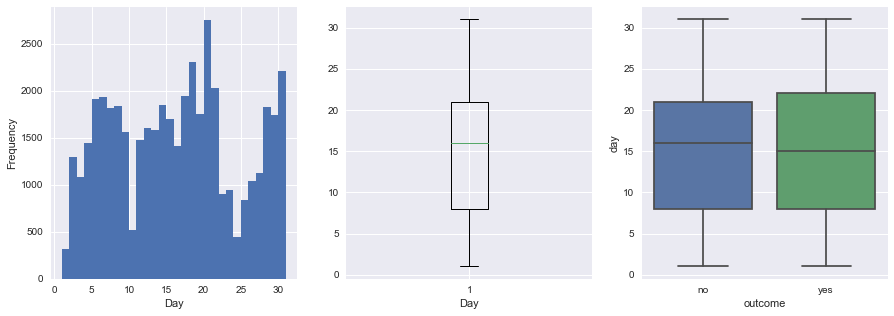

In [120]:
# Day - last contact day of the month

plt.subplot(1, 3, 1)
dayplt = bank.day.plot( kind='hist', bins = 30, figsize=(15,5))
plt.xlabel('Day')

plt.subplot(1, 3, 2)
daybox = plt.boxplot(bank.day, 0, 'b')
plt.xlabel('Day')

plt.subplot(1, 3, 3)
daybox2 = sns.boxplot(x="y", y="day", data=bank)
daybox2.set(xlabel='outcome')

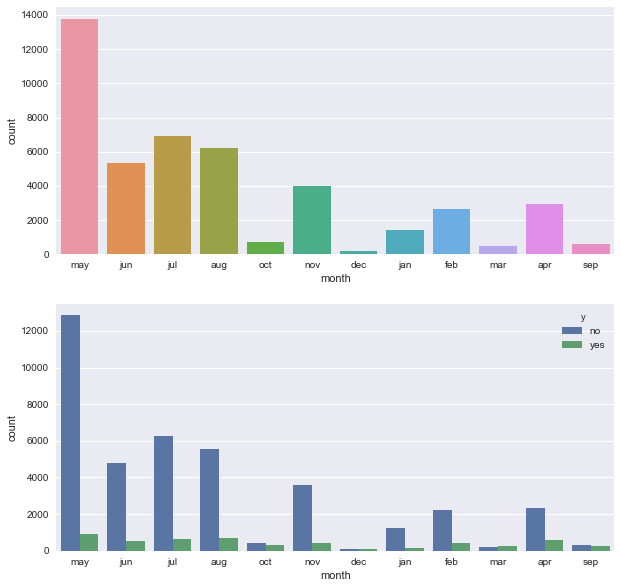

In [153]:
# Month - last contact month of year
fig, axes = plt.subplots(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.countplot(x="month", data=bank)

plt.subplot(2, 1, 2)
sns.countplot(x="month", hue='y', data=bank)

In [143]:
# Calculate the proportion of those who subscribed vs those who didn't, grouped by the month
monthsuccess = bank['month'].loc[bank['y']== 'yes'].value_counts()
monthcount = bank['month'].value_counts()

for item in range(len(monthcount)):
    print("The proportion of success for "+ str(monthcount.keys()[item])+" is "+'{0:2.3f}'.format(monthsuccess[item]/monthcount[item]))


#Chi squared test, to evaluate the importance of this feature

sum = 0

for item in range(len(monthcount)):
    sum += (((monthsuccess[item]/monthcount[item])-expected)**2)/expected

print('Test statistic: ' + str(sum))

#Logistic regression

The proportion of success for may is 0.067
The proportion of success for jul is 0.100
The proportion of success for aug is 0.100
The proportion of success for jun is 0.108
The proportion of success for nov is 0.138
The proportion of success for apr is 0.150
The proportion of success for feb is 0.152
The proportion of success for jan is 0.230
The proportion of success for oct is 0.364
The proportion of success for sep is 0.428
The proportion of success for mar is 0.298
The proportion of success for dec is 0.467
Test statistic: 2.84048323228


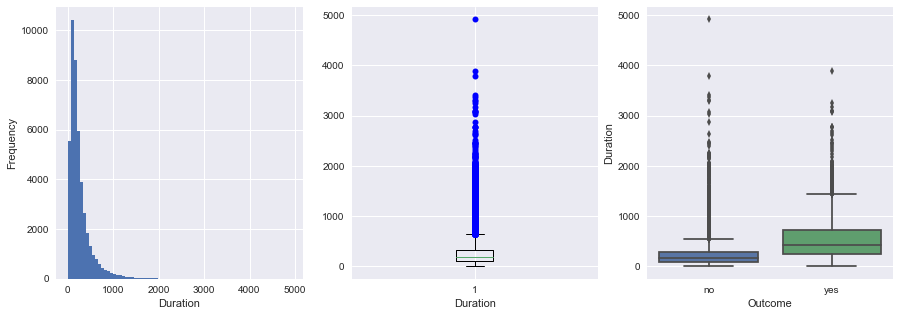

In [158]:
# Duration - last contact duration, in seconds

plt.subplot(1, 3, 1)
durationplt = bank.duration.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Duration')

plt.subplot(1, 3, 2)
durationbox = plt.boxplot(bank.duration, 0, 'b')
plt.xlabel('Duration')

plt.subplot(1, 3, 3)
durationbox2 = sns.boxplot(x="y", y="duration", data=bank)
durationbox2.set(xlabel='Outcome')
durationbox2.set(ylabel='Duration')

In [9]:
#Logistic regression

# We start by creating training data frame, it consists of dummy variables for the ages and the outcome, notice that since we
# a binary outcome we drop the 'no' variable, since we know that not yes means no
durationdf = bank.loc[:,'duration']
ydf = bank.loc[:,'y']
y = pd.get_dummies(ydf)
duration = pd.get_dummies(durationdf)
train = pd.concat([duration,y],axis=1)
train.drop(['no'],axis=1,inplace=True)

# We split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(train.drop('yes', axis=1), train['yes'], test_size=0.30)

# We run the logistic regression and check the accuracy of our model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94     12019
          1       0.46      0.02      0.04      1545

avg / total       0.84      0.89      0.84     13564



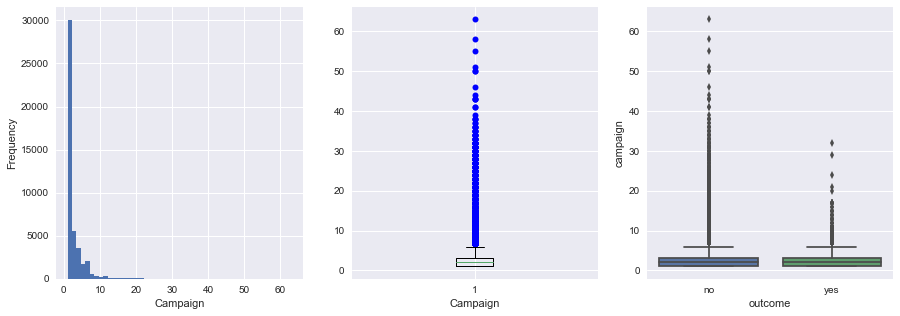

In [123]:
# Campaign - number of contacts performed during this campaign and for this client

plt.subplot(1, 3, 1)
campplt = bank.campaign.plot( kind='hist', bins = 50, figsize=(15,5))
plt.xlabel('Campaign')

plt.subplot(1, 3, 2)
campbox = plt.boxplot(bank.campaign, 0, 'b')
plt.xlabel('Campaign')

plt.subplot(1, 3, 3)
campbox2 = sns.boxplot(x="y", y="campaign", data=bank)
campbox2.set(xlabel='outcome')

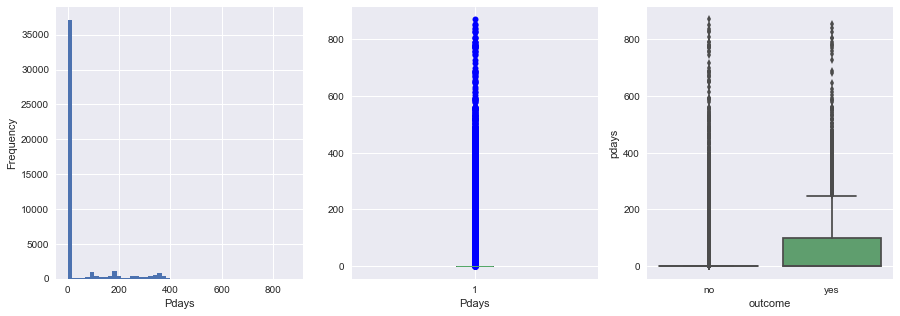

In [124]:
# Pdays - number of days that passed by after the client was last contacted from a previous campaign, note -1 means not
# previously contacted

plt.subplot(1, 3, 1)
pdaysplt = bank.pdays.plot( kind='hist', bins = 50, figsize=(15,5))
plt.xlabel('Pdays')

plt.subplot(1, 3, 2)
pdaysbox = plt.boxplot(bank.pdays, 0, 'b')
plt.xlabel('Pdays')

plt.subplot(1, 3, 3)
pdaysbox2 = sns.boxplot(x="y", y="pdays", data=bank)
pdaysbox2.set(xlabel='outcome')

In [333]:
#Logistic regression

# We start by creating training data frame, it consists of dummy variables for the ages and the outcome, notice that since we
# a binary outcome we drop the 'no' variable, since we know that not yes means no
pdaysdf = bank.loc[:,'pdays']
ydf = bank.loc[:,'y']
y = pd.get_dummies(ydf)
pdays = pd.get_dummies(pdaysdf)
train = pd.concat([pdays,y],axis=1)
train.drop(['no'],axis=1,inplace=True)

# We split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(train.drop('yes', axis=1), train['yes'], test_size=0.30)

# We run the logistic regression and check the accuracy of our model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      0.99      0.94     11976
          1       0.59      0.07      0.12      1588

avg / total       0.85      0.89      0.84     13564



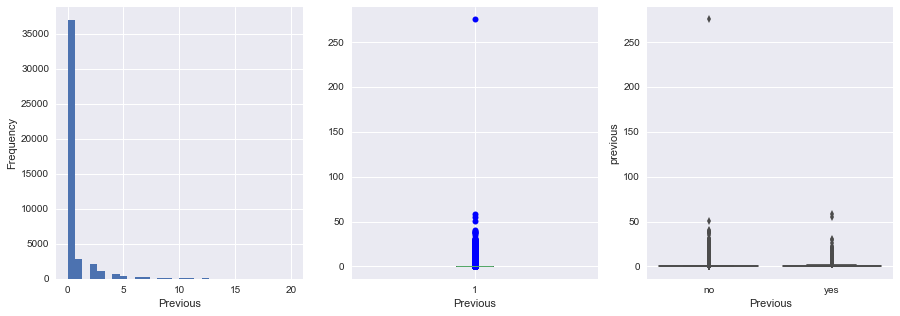

In [126]:
# Previous - number of contacts performed before this campaign and for this client

plt.subplot(1, 3, 1)
prevplt = bank.previous.plot( kind='hist', bins = 30, range=(0,20), figsize=(15,5))
plt.xlabel('Previous')

plt.subplot(1, 3, 2)
prevbox = plt.boxplot(bank.previous, 0, 'b')
plt.xlabel('Previous')

plt.subplot(1, 3, 3)
prevbox2 = sns.boxplot(x="y", y="previous", data=bank)
prevbox2.set(xlabel='Previous')

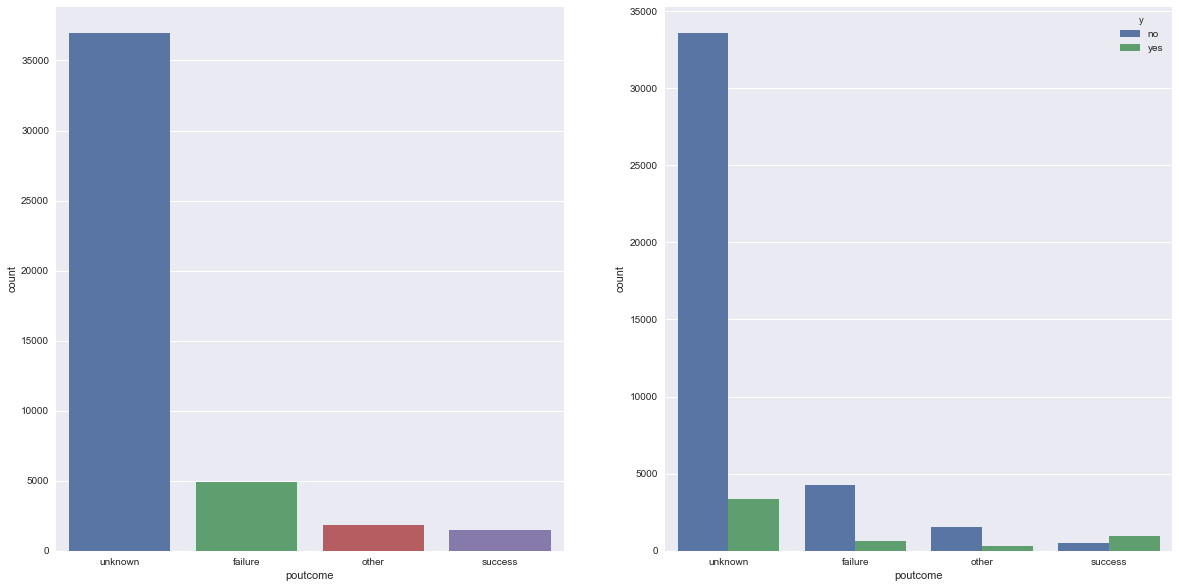

In [172]:
# Poutcome - Outcome of the previous marketing campaign
fig, axes = plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="poutcome", data=bank)

plt.subplot(1, 2, 2)
sns.countplot(x="poutcome", hue='y', data=bank)

In [128]:
# Calculate the proportion of those who subscribed vs those who didn't, grouped by the previous outcome

poutcomesuccess = bank['poutcome'].loc[bank['y']== 'yes'].value_counts()
poutcomecount = bank['poutcome'].value_counts()

for item in range(len(poutcomecount)):
    print("The proportion of success for the poutcome: "+ str(poutcomecount.keys()[item])+" is "+'{0:2.3f}'.format(poutcomesuccess[item]/poutcomecount[item]))

# Chi squared test to evaluate the statistical significance of this feature

sum = 0

for item in range(len(poutcomecount)):
    sum += (((poutcomesuccess[item]/poutcomecount[item])-expected)**2)/expected

print('Test statistic ' + str(sum))

The proportion of success for the poutcome: unknown is 0.092
The proportion of success for the poutcome: failure is 0.200
The proportion of success for the poutcome: other is 0.336
The proportion of success for the poutcome: success is 0.203
Test statistic 0.536825296723


## Decision tree

In [27]:
# We first load the features into our data frame, we do this by dropping the outcome variable from our bank dataframe
X = bank.drop(['y'],axis=1)

# We need to convert the features to dummy variables so that we can run the dataframe through our decision tree algorithms
for col in X:
    col = pd.get_dummies(X[col])
    X = pd.concat([X,col],axis=1)

# Now that we have inserted the dummy variables, we drop the old feature columns using a for loop
for col in ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
            'campaign', 'pdays', 'previous', 'poutcome']:
                X.drop([col],axis=1,inplace=True)

# We create a dataframe y, it contains our output variable, this is what we will use to train and test our decision tree
y = bank['y']

# We then split the data into a training and testing set and train the decision tree 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [30]:
# we use the classification report to evaluate our tree
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         no       0.91      0.95      0.93     11952
        yes       0.45      0.32      0.37      1612

avg / total       0.86      0.87      0.86     13564



In [32]:
# We will now use a random forest classifier to see if we can get a better estimate
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [183]:
# Comparing the two trees, we can see that although there is only a small improvement is total precision, our ability to predict
# a positive 'yes' outcome has dramatically improved
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

         no       0.92      0.97      0.94     11979
        yes       0.60      0.37      0.46      1585

avg / total       0.88      0.90      0.89     13564

